In [296]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split

# nltk.download()

df = pd.read_csv("wineReviews.csv", sep='\t')
print(df.head())
print(df['country'].value_counts())

   wineId  country                                        description
0     219  Hungary  From a vineyard in Northern Tokaj this dry Fur...
1     271   Greece  Lively aromas of lemon, grapefruit and melon s...
2     308   Greece  This fuller-bodied white blend offers pineappl...
3     351  Hungary  This amber-colored Hungarian stunner has ether...
4     377   Greece  A fresh, tangy, vibrant wine that has ripe gre...
Greece      466
Hungary     146
Slovenia     87
Croatia      73
Name: country, dtype: int64


In [297]:
print(df.loc[df['country'] == 'Slovenia']['description'])

14     Earthy with hints of roasted nuts and dried he...
30     This Slovenian Chardonnay has aromas of orange...
32     This amber colored, orange-style wine has arom...
33     This wine is garnet in color, with aromas of c...
53     Vanilla and cookie crumb notes add a sweet, to...
                             ...                        
722    Zesty and full bodied, this has delightful aro...
730    This has ebullient aromas of cherry blossom, g...
748    This blend of 70% Blaufränkisch, 20% Pinot Noi...
769    This blend is garnet colored with a hint of eu...
770    Dark cherry to garnet in color, it offers note...
Name: description, Length: 87, dtype: object


In [298]:
text = df.loc[df['country'] == 'Slovenia']['description'].str.cat(sep=' ')
print(text)

Earthy with hints of roasted nuts and dried herb, this is a uniquely savory Sauvignon that would pair well with herb-accented fowl and fish. The palate is round and rich, but balanced with brisk lime acidity and a characteristic grassiness on the finish. This Slovenian Chardonnay has aromas of orange, vanilla, toasted almonds and citrus blossom. The mouth delivers flavors of honeydew melon, pear and apple before a crisp acidic finish. This amber colored, orange-style wine has aromas of canned peaches and apricots on the nose, while fresh stone fruits seem to dominate the full bodied palate. The finish is creamy and lingers on. This wine is garnet in color, with aromas of cherry, vanilla, red plum and cassis. Flavors of tart cherry, red raspberry and blackberry drive the palate and lead to a lingering finish. Vanilla and cookie crumb notes add a sweet, toasty flair to the sour cherry flavor on this bright, nervy red. The palate is tart, tangy and refreshingly tasty, with soft, chalky ta

In [299]:
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens]

tokens_frequency = FreqDist(tokens)

for word, freq in tokens_frequency.most_common(10):
  print(f'{word:<15}: {freq}')

,              : 232
and            : 224
.              : 193
of             : 184
the            : 126
with           : 101
a              : 99
this           : 83
flavors        : 63
is             : 62


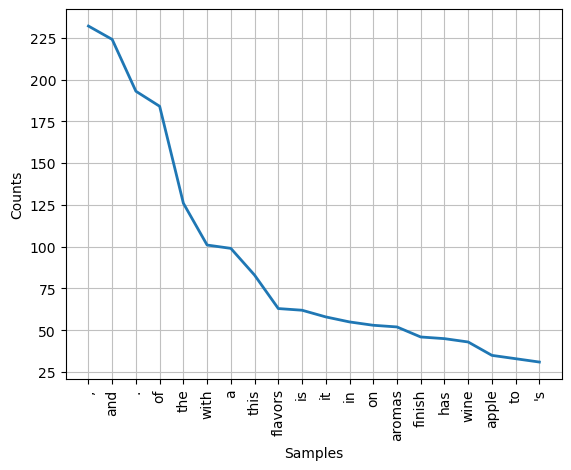

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [300]:
tokens_frequency.plot(20, cumulative=False)

In [301]:
stop_list = stopwords.words('english') + list(string.punctuation)
tokens_without_stop = [token for token in tokens if token not in stop_list]

tokens_frequency_without_stop = FreqDist(tokens_without_stop)

for word, freq in tokens_frequency_without_stop.most_common(5):
  print(f'{word:<15}: {freq}')

flavors        : 63
aromas         : 52
finish         : 46
wine           : 43
apple          : 35


In [302]:
stemmer = PorterStemmer()
tokens_stemmed = [stemmer.stem(word) for word in tokens_without_stop]

In [303]:
bigrams = FreqDist(ngrams(tokens_stemmed, 2))
trigrams = FreqDist(ngrams(tokens_stemmed, 3))

print("Four most common bigrams:")
for word, freq in bigrams.most_common(4):
  print(f'{str(word):<15}: {freq}')

print("Four most common bigrams:")
for word, freq in trigrams.most_common(4):
  print(f'{str(word):<15}: {freq}')

Four most common bigrams:
('green', 'appl'): 11
('ribolla', 'gialla'): 11
('white', 'peach'): 8
('mouth', 'flavor'): 8
Four most common bigrams:
('aroma', 'freshli', 'mow'): 4
('ribolla', 'gialla', 'aroma'): 4
('freshli', 'cut', 'grass'): 4
('linger', 'long', 'finish'): 4


In [304]:
def process_description(description: str):
  result = [stemmer.stem(token.lower()) for token in word_tokenize(description) if token not in stop_list]
  return ' '.join(result)

df['processed'] = df['description'].apply(process_description)
print(df.head())

   wineId  country                                        description  \
0     219  Hungary  From a vineyard in Northern Tokaj this dry Fur...   
1     271   Greece  Lively aromas of lemon, grapefruit and melon s...   
2     308   Greece  This fuller-bodied white blend offers pineappl...   
3     351  Hungary  This amber-colored Hungarian stunner has ether...   
4     377   Greece  A fresh, tangy, vibrant wine that has ripe gre...   

                                           processed  
0  from vineyard northern tokaj dri furmint aroma...  
1  live aroma lemon grapefruit melon start white ...  
2  thi fuller-bodi white blend offer pineappl kiw...  
3  thi amber-color hungarian stunner ether aroma ...  
4  a fresh tangi vibrant wine ripe green plum app...  


In [305]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),
                             lowercase=True)

inputData = vectorizer.fit_transform(df['processed'])

print("Number of tokens created:", len(vectorizer.get_feature_names_out()))

Number of tokens created: 1743


In [306]:
X_train, X_test, y_train, y_test = train_test_split(inputData, df['country'], test_size=0.25, random_state=123)

clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7927461139896373


In [307]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),
                             lowercase=True)

inputData = vectorizer.fit_transform(df['processed'])

print("Number of tokens created:", len(vectorizer.get_feature_names_out()))

X_train, X_test, y_train, y_test = train_test_split(inputData, df['country'], test_size=0.25, random_state=123)

clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))

Number of tokens created: 10887
0.6735751295336787


In [308]:
vectorizer = TfidfVectorizer(ngram_range=(3,3),
                             lowercase=True)

inputData = vectorizer.fit_transform(df['processed'])

print("Number of tokens created:", len(vectorizer.get_feature_names_out()))

X_train, X_test, y_train, y_test = train_test_split(inputData, df['country'], test_size=0.25, random_state=123)

clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))

Number of tokens created: 15559
0.6735751295336787


In [309]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),
                             lowercase=True)

inputData = vectorizer.fit_transform(df['description'])

print("Number of tokens created:", len(vectorizer.get_feature_names_out()))

X_train, X_test, y_train, y_test = train_test_split(inputData, df['country'], test_size=0.25, random_state=123)

clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))

Number of tokens created: 2109
0.772020725388601
